# Pip


In [91]:
%pip install torch
%pip install gymnasium
%pip install matplotlib
%pip install pygame

%pip install python-opengl -y
%pip install xvfb -y
%pip install pyvirtualdisplay
%pip install piglet
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



Usage:   
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] [-e] <vcs project url> ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] [-e] <local project path> ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


Note: you may need to restart the kernel to use updated packages.



Usage:   
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] [-e] <vcs project url> ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] [-e] <local project path> ...
  e:\!Python\gymnasium-work\.venv\Scripts\python.exe -m pip install [options] <archive url/path> ...

no such option: -y


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Imports

In [92]:
import torch
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import Env

import warnings
warnings.filterwarnings("ignore")

import json
from typing import List, Tuple, Dict
from tqdm import tqdm
from collections import deque, namedtuple
import random

from PIL import Image


# Env

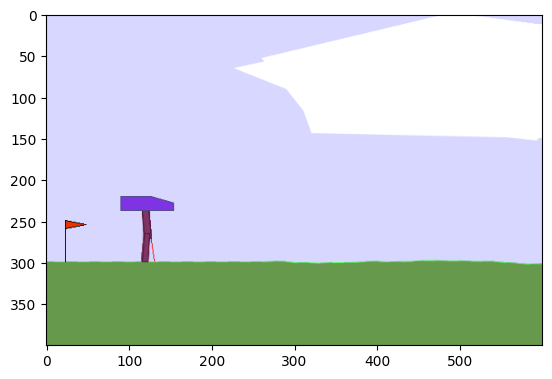

state: [ 2.7475203e-03 -4.4608951e-06  3.4701682e-04 -1.5999969e-02
  9.2089362e-02 -4.5794604e-04  8.6019516e-01  1.7416166e-03
  1.0000000e+00  3.2494564e-02 -4.5791775e-04  8.5374480e-01
  3.2386556e-04  1.0000000e+00  4.4081402e-01  4.4582012e-01
  4.6142277e-01  4.8955020e-01  5.3410280e-01  6.0246104e-01
  7.0914888e-01  8.8593185e-01  1.0000000e+00  1.0000000e+00]


In [93]:
env = gym.make("BipedalWalker-v3", render_mode="rgb_array", hardcore=False)

def draw_env(env: Env) -> None:
    plt.imshow(env.render())
    plt.show()


observation_space_bounds = [
    (3.14, -3.14), 
    (5., -5.), 
    (5., -5.), 
    (5., -5.), 
    (3.14, -3.14), 
    (5., -5.), 
    (3.14, -3.14), 
    (5., -5.), 
    (5., -0.), 
    (3.14, -3.14), 
    (5., -5.), 
    (3.14, -3.14), 
    (5., -5.), 
    (5., -0.)
]


def get_discrete_actions(steps_count_per_action=1) -> List[List[float]]:
    actions_list = []
    steps_count_per_action = 1

    action = [0.0, 0.0, 0.0, 0.0]
    actions_list.append(action)
    for joint in range(4):
        for i in range(1, steps_count_per_action + 1):
            action = [0.0, 0.0, 0.0, 0.0]
            action[joint] = i / steps_count_per_action
            actions_list.append(action)

            action = [0.0, 0.0, 0.0, 0.0]
            action[joint] = - i / steps_count_per_action
            actions_list.append(action)

    return torch.Tensor(actions_list)

actions_list = get_discrete_actions(1)

state = env.reset()[0]

draw_env(env)

print("state:", state)

In [94]:
def add_history(history: List[float], path="history.json") -> None:
    with open(path, "r") as file:
        j_obj = json.loads(file.read())

        j_obj["rewards"] += history

    with open(path, "w") as file:
        file.write(json.dumps(j_obj))

def clear_history(path="history.json") -> None:
    with open(path, "w") as file:
        file.write(json.dumps(
            { 
                "rewards": []
            }
        ))

# DQN

In [111]:
los = torch.nn.MSELoss()(torch.Tensor([1.1, 12.4]), torch.Tensor([2.8, 9.1]))
los

tensor(6.8900)

In [158]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'new_state', 'reward'))

class ReplayMemory:
    def __init__(self, capacity) -> None:
        self.memory = deque([], maxlen=capacity)

    def push(self, state, action_id, new_state, reward) -> None:
        self.memory.append(Transition(state, action_id, new_state, reward))

    def sample(self, batch_size) -> List[Transition]:
        return random.sample(self.memory, batch_size)

    def __len__(self) -> int:
        return len(self.memory)


class Dqn:
    __slots__ = ("model")

    def __init__(self, in_len, out_len) -> None:
        torch.manual_seed(10)
        self.model = torch.nn.Sequential(
            torch.nn.Linear(in_len, 128),
            torch.nn.Linear(128, 256),
            torch.nn.Linear(256, 128),
            torch.nn.Linear(128, out_len)
        )

    def get_model(self) -> torch.nn.Sequential:
        return self.model


class AgentDQN:
    __slots__ = ("env", "n_states", "nn_policy", "nn_target", "actions_list", "optimizer", "criterion", "memory", "batch_size")

    def __init__(self, env: Env, 
        n_states: int, 
        nn_policy: Dqn, 
        nn_target: Dqn, 
        actions_list: List[List[torch.Tensor]], 
        memory_size: int, 
        batch_size: int,
        lr=0.15
    ) -> None:
        self.env = env
        self.n_states = n_states
        self.actions_list = actions_list
        
        self.memory = ReplayMemory(memory_size)
        self.batch_size = batch_size

        self.nn_policy = nn_policy
        self.nn_target = nn_target

        self.optimizer = torch.optim.AdamW(self.nn_policy.get_model().parameters(), lr=lr, amsgrad=True)
        self.criterion = torch.nn.MSELoss()

    def state_slice(self, state: torch.Tensor) -> torch.Tensor:
        return state[0: self.n_states]

    def get_action_id(self, state: torch.Tensor, eps: float, target=False) -> int:
        """Epsilon greedy policy"""
        if random.random() < eps:
            action_id = torch.randint(0, len(self.actions_list), (1,))
        else:
            action_id = torch.argmax(self.get_q_values_all(state, target=target))
        return action_id.item()

    def get_q_values_all(self, state: torch.Tensor, target=False) -> List[float]:
        if (target):
            values = self.nn_target.get_model()(state)
        else:
            values = self.nn_policy.get_model()(state)
        return torch.Tensor(values)


    def update_model(self, gamma) -> None:
        """DQN"""
        if len(self.memory) < self.batch_size:
            return
        
        transitions = self.memory.sample(self.batch_size)
        batch = Transition(*zip(*transitions))

        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                            batch.new_state)), dtype=torch.bool)
        non_final_next_states = torch.cat([s for s in batch.new_state
                                                    if s is not None])
        
        state_batch = torch.cat(batch.state)
        # action_batch = torch.cat(batch.action, dim=0)
        reward_batch = torch.cat(batch.reward)

        state_action_values = self.nn_policy.get_model()(state_batch)

        next_state_values = torch.zeros(self.batch_size)
        with torch.no_grad():
            next_state_values[non_final_mask] = self.nn_target.get_model()(non_final_next_states).max(1).values

        expected_state_action_values = (next_state_values * gamma) + reward_batch
        
        loss = self.criterion(state_action_values, expected_state_action_values.unsqueeze(1))
        self.optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_value_(self.nn_policy.get_model().parameters(), 100)
        self.optimizer.step()

    def train(self, n_episodes: int, gamma=0.5, eps_max=0.9, eps_min=0.05, actions_limit=1_000) -> List[float]:
        total_reward_episode: List[float] = []

        for episode_i in tqdm(range(n_episodes)):
            total_reward = 0
            is_done = False
            state = self.state_slice(torch.Tensor(self.env.reset()[0]))
            action_count = 0

            current_eps = eps_max - (eps_max - eps_min) / n_episodes * episode_i
            while not is_done and action_count < actions_limit:
                action_id = self.get_action_id(state, current_eps)
                action = self.actions_list[action_id]

                new_state, reward, terminated, truncated,  _ = self.env.step(action)
                is_done = terminated or truncated
                new_state = self.state_slice(torch.Tensor(new_state))

                self.memory.push(state.unsqueeze(0), torch.tensor([action_id], dtype=torch.int64), new_state.unsqueeze(0), torch.tensor([reward], dtype=torch.float32))

                self.update_model(gamma)

                action_count += 1
                total_reward += reward
                state = new_state

            total_reward_episode.append(total_reward.item())

        return total_reward_episode


    def run_episode(self, eps=0.0, actions_limit=1_000) -> Tuple[List, List, List, float, bool, int]:
        """Tests and visualizes the agent"s work"""
        states = []
        actions_set = set([])
        actions_distr = [0, ] * len(self.actions_list)
        is_done = False

        state = self.state_slice(torch.Tensor(self.env.reset()[0]))

        images = []
        total_reward = 0
        action_count = 0

        while not is_done and len(images) < actions_limit:
            action_id = self.get_action_id(state, eps, target=True)
            action = self.actions_list[action_id]
            
            new_state, reward, terminated, truncated,  _ = self.env.step(action)
            is_done = terminated or truncated
            new_state = self.state_slice(torch.Tensor(new_state))

            total_reward += reward
            actions_set.add(action_id)
            actions_distr[action_id] += 1

            action_count += 1
            state = new_state

            if (action_count % 3 == 0):
                images.append(Image.fromarray(self.env.render()[30:350, 0:300]))

        images[0].save("array.gif", save_all=True, append_images=images[1:], optimize=True, duration=0.05, loop=0)

        return states, actions_set, actions_distr, total_reward, is_done, len(images)


    def save(self, dir: str) -> None:
        torch.save(self.nn_model.state_dict(), f"{dir}/model")

    def load(self, dir: str) -> None:
        self.nn_model.load_state_dict(torch.load(f"{dir}/model"))

## Training

In [159]:
actions_list = get_discrete_actions(1)

nn_policy = Dqn(24, len(actions_list))
nn_target = Dqn(24, len(actions_list))
nn_target.get_model().load_state_dict(nn_policy.get_model().state_dict())

dqn_model = AgentDQN(
    env,
    n_states=24,
    nn_policy=nn_policy,
    nn_target=nn_target,
    actions_list=actions_list,
    memory_size=6000,
    batch_size=100,
    lr=0.001
)

In [ ]:
dqn_model.load("model_dqn_1_1")

In [160]:
history_rewards = dqn_model.train(500, gamma=0.99, eps_max=0.9, eps_min=0.05, actions_limit=800)
print(history_rewards)
add_history(history_rewards)

  5%|▌         | 26/500 [01:00<26:13,  3.32s/it]

In [ ]:
dqn_model.save("model_dqn_1_1")

In [ ]:
states, actions_set, actions_distr, reward, is_done, size = dqn_model.run_episode(eps=0.0, actions_limit=300)
print(reward)
print(actions_distr)
print(size)